In [1]:
# %%
import os
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

# Đường dẫn tới thư mục chứa ảnh
base_dir = r"D:\nhapmonxulyanhso\XLA_lab3\exercise"

# Hàm hiển thị ảnh
def show(img, title=None, cmap='gray'):
    plt.figure(figsize=(5,5))
    plt.imshow(img, cmap=cmap)
    if title: plt.title(title)
    plt.axis('off')
    plt.show()


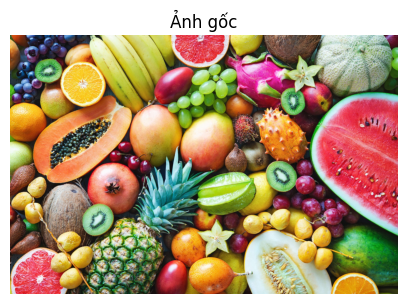

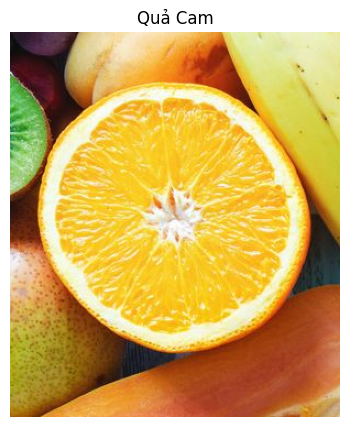

In [24]:
#bai1
img_path = os.path.join(base_dir, "colorful-ripe-tropical-fruits.jpg")
img = iio.imread(img_path)
show(img, 'Ảnh gốc')


# Thử chọn đối tượng khác 
org= img[100:450, 250:550, :]
show(org, 'Quả Cam')


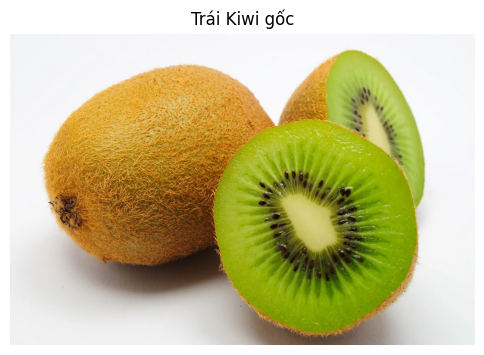

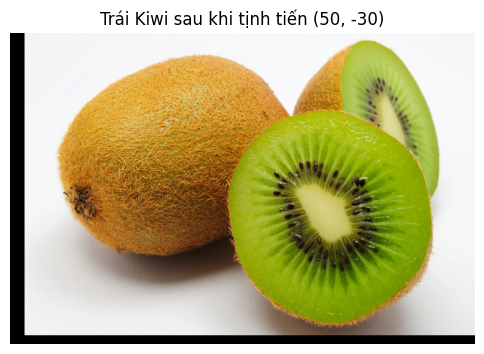

In [7]:
import os
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import scipy.ndimage as nd

# bai2
base_dir = r"D:\nhapmonxulyanhso\XLA_lab3\exercise"
img_path = os.path.join(base_dir, "kiwi.png")  # 🔄 Đã sửa thành kiwi.png

# Hàm hiển thị ảnh
def show(img, title='', cmap=None):
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Đọc ảnh kiwi
kiwi = iio.imread(img_path)
show(kiwi, 'Trái Kiwi gốc')

# 📌 Tịnh tiến ảnh kiwi (50 sang phải, 30 lên trên)
kiwi_shifted = nd.shift(kiwi, shift=(-30, 50, 0))  # shift=(dy, dx, channel)
show(kiwi_shifted, 'Trái Kiwi sau khi tịnh tiến (50, -30)')


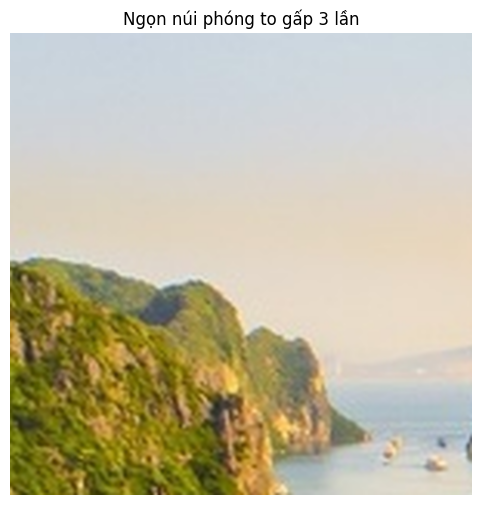

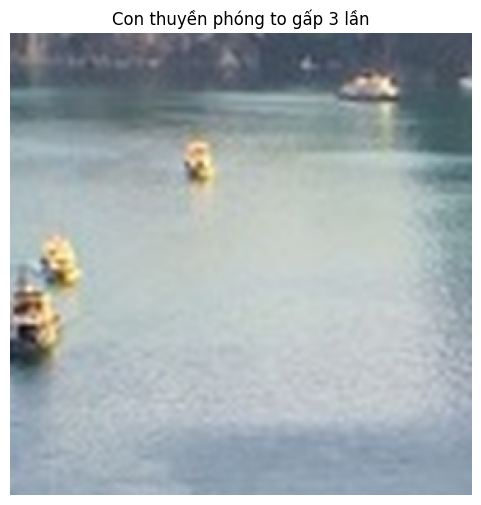

In [42]:
#bai3
# Đường dẫn ảnh
base_dir = r"D:\nhapmonxulyanhso\XLA_lab3\exercise"
quangninh_path = os.path.join(base_dir, "quang_ninh.jpg")

# Đọc ảnh RGB
q_img = iio.imread(quangninh_path, mode='RGB')

# Hàm hiển thị
def show(img, title=''):
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

# 📌 Cắt vùng ngọn núi và con thuyền
mountain = q_img[50:200, 100:250, :]
boat     = q_img[180:280, 300:400, :]

# 📌 Phóng to gấp 3 lần
mountain_zoomed = nd.zoom(mountain, zoom=(3.0, 3.0, 1.0))
boat_zoomed     = nd.zoom(boat, zoom=(3.0, 3.0, 1.0))

# Hiển thị
show(mountain_zoomed, "Ngọn núi phóng to gấp 3 lần")
show(boat_zoomed, "Con thuyền phóng to gấp 3 lần")


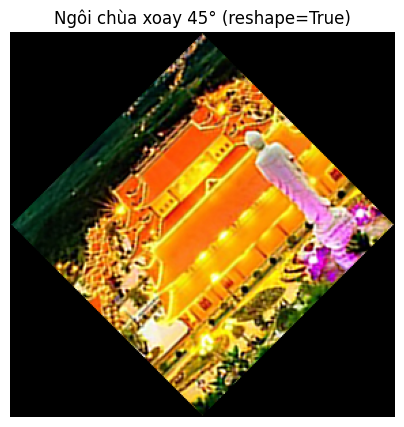

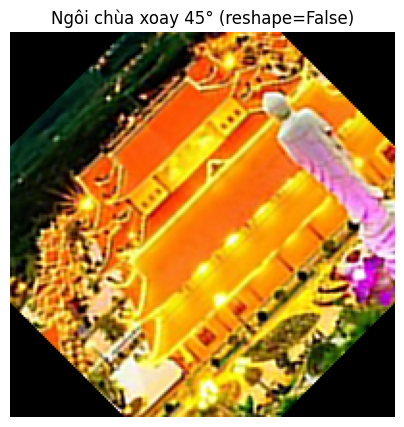

In [ ]:
#cau4
# Đường dẫn ảnh
base_dir = r"D:\nhapmonxulyanhso\XLA_lab3\exercise"
pagoda_path = os.path.join(base_dir, "pagoda.jpg")

# Đọc ảnh RGB
img = iio.imread(pagoda_path, mode='RGB')

# Hàm hiển thị
def show(img, title=''):
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()
 # [y1:y2, x1:x2]

# Xoay 45 độ với reshape=True
pagoda_rot1 = nd.rotate(pagoda, angle=45, reshape=True)

# Xoay 45 độ với reshape=False
pagoda_rot2 = nd.rotate(pagoda, angle=45, reshape=False)

# 📌 Hiển thị
show(pagoda_rot1, "Ngôi chùa xoay 45° (reshape=True)")
show(pagoda_rot2, "Ngôi chùa xoay 45° (reshape=False)")


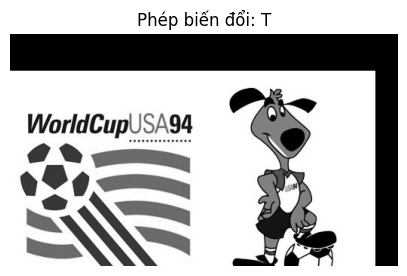

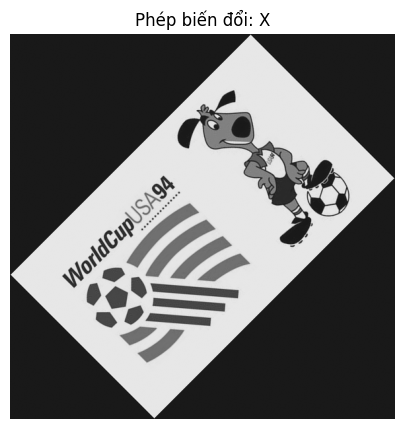

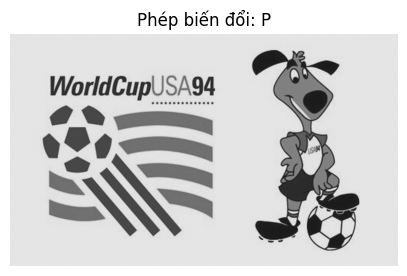

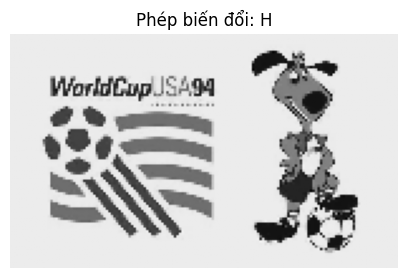

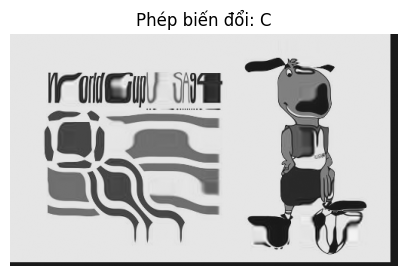

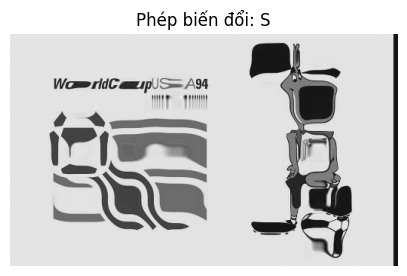

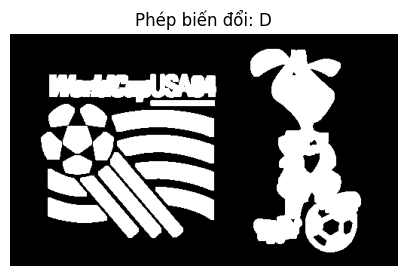

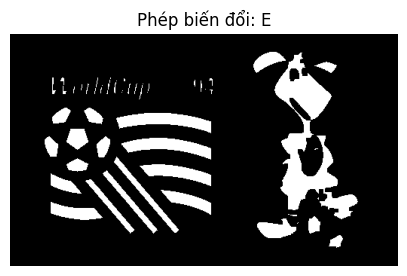

In [6]:
#cau5
import os
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

base_dir = r"D:\nhapmonxulyanhso\XLA_lab3\exercise"
img_path = os.path.join(base_dir, "world_cup.jpg")

# Sửa lỗi: dùng mode='F' thay cho as_gray=True
gray_img = iio.imread(img_path, mode='F')

def show(img, title=None, cmap='gray'):
    plt.figure(figsize=(5,5))
    plt.imshow(img, cmap=cmap)
    if title: plt.title(title)
    plt.axis('off')
    plt.show()

def GeoFun(outcoord):
    a = 10 * np.cos(outcoord[0]/10.0) + outcoord[0]
    b = 10 * np.cos(outcoord[1]/10.0) + outcoord[1]
    return a, b

def GeoFunSin(outcoord):
    a = 10 * np.sin(outcoord[0]/10.0) + outcoord[0]
    b = 10 * np.sin(outcoord[1]/10.0) + outcoord[1]
    return a, b

def apply_transformation(image, key):
    if key == 'T':
        return nd.shift(image, shift=(50, -30))
    elif key == 'X':
        return nd.rotate(image, angle=45, reshape=True)
    elif key == 'P':
        return nd.zoom(image, 3.0)
    elif key == 'H':
        return nd.zoom(image, 0.3)
    elif key == 'C':
        return nd.geometric_transform(image, GeoFun)
    elif key == 'S':
        return nd.geometric_transform(image, GeoFunSin)
    elif key == 'D':
        binary = image < image.mean()
        return ndi.binary_dilation(binary, structure=np.ones((5,5)))
    elif key == 'E':
        binary = image < image.mean()
        return ndi.binary_erosion(binary, structure=np.ones((5,5)))
    else:
        return image

for key in ['T', 'X', 'P', 'H', 'C', 'S', 'D', 'E']:
    result = apply_transformation(gray_img, key)
    show(result, f'Phép biến đổi: {key}')
